In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-poster')

# Code for the least squares

In [7]:
# generate x and y
x = np.array([15.5, 23.75, 8, 17, 5.5, 19,24,2.5,7.5,11,13,3.75,25,9.75,22,18,6,12.5,2,21.5])
y = np.array([2158.7, 1678.15, 2316, 2061.3, 2207.5, 1708.3, 1784.7, 2575, 2357.9, 2256.7, 2165.2, 2399.55,1779.8, 2336.75, 1765.3, 2053.5, 2414.40, 2200.5, 2654.2, 1753.7])

In [8]:
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [35]:
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print("Coefficients:\nIntercept: ", alpha[1][0],"\nAge of Propellant: ", alpha[0][0])

Coefficients:
Intercept:  2627.8223590012963 
Age of Propellant:  -37.153590944905226


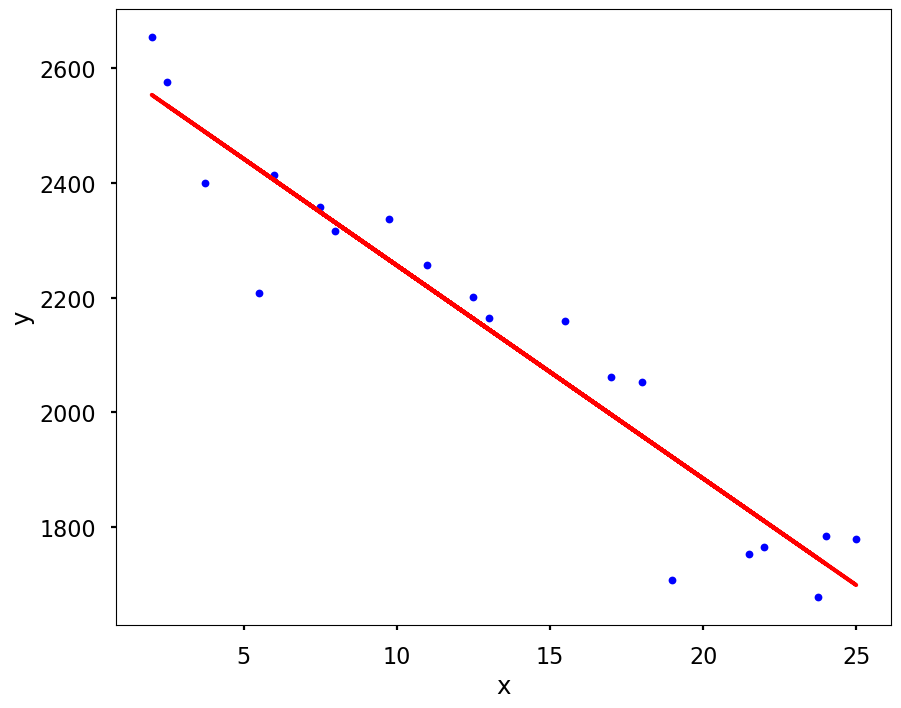

In [23]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Code for Multiple Least Squares

In [24]:
xm = np.array([[7,560], [3,220], [3,340], [4,80], [6,150], [7,330], [2,110], [7,210], [30,1460], [5,605], [16,688], [10,215], [4,255], [6,462], [9,448], [10,776], [6,200], [7,132], [3,36], [17,770], [10,140], [26,810], [9,450], [8,635], [4,150]], dtype = float) 
y2 = np.array([16.68, 11.5, 12.03, 14.88, 13.75, 18.11, 8, 17.83, 79.24, 21.5, 40.33, 21, 13.5, 19.75, 24, 29, 15.35, 19, 9.5, 35.10, 17.9, 52.32, 18.75, 19.83, 10.75])

In [27]:
A2 = np.concatenate((np.ones((xm.shape[0], 1)), xm), axis=1)

# turn y into a column vector
y2 = y2[:, np.newaxis]

In [37]:
alpha2 = np.dot((np.dot(np.linalg.inv(np.dot(A2.T,A2)),A2.T)),y2)
print("Coefficients:\nIntercept: ", alpha2[0][0],"\nNumber of cases: ", alpha2[1][0],"\nDistance: ", alpha2[2][0])

Coefficients:
Intercept:  2.3412311451921566 
Number of cases:  1.6159072106092514 
Distance:  0.014384826255548131


# Generalized Least Squares

In [2]:
df = pd.read_excel('C:/Users/User/Desktop/Study/Computations in Linear Algebra/project_data.xls')

glsApple = df.to_numpy()
glsA = glsApple[:,0:3]
glsA = np.concatenate((np.ones((glsA.shape[0], 1)), glsA), axis=1)
glsb = glsApple[:,3]

In [54]:
def GLS(A,b):
    Xt = A.T
    
    XtX = Xt @ A
    H = A @ np.linalg.inv(XtX) @ Xt
    V = np.eye(H.shape[0]) - H
    V_inv = np.linalg.inv(V)

    eigenvalues, eigenvectors = np.linalg.eig(V)

    # Take square root of eigenvalues
    sqrt_eigenvalues = np.sqrt(np.around(eigenvalues, decimals = 0))
    sqrt_eigenvalues[np.isnan(sqrt_eigenvalues)] = 0

    new_beta = np.linalg.inv(Xt @ V_inv @ A)@ Xt @ V_inv @ glsb

    return new_beta

In [55]:
result = GLS(glsA,glsb)

In [56]:
print("Coefficients:\nIntercept: ", result[0],"\nOpen: ", result[1],"\nClose: ", result[2],"\nVolume: ", result[3])

Coefficients:
Intercept:  -1.8061331086617154 
Open:  0.0010493428342614798 
Close:  1.004517218418194 
Volume:  -3.238861507657687e-09


# Condition numbers

In [4]:
con1 = np.linalg.norm(glsA, ord = 1)
con2 = np.linalg.norm(glsA, ord = 2)
coninf = np.linalg.norm(glsA, ord = np.inf)

glsAinv = np.linalg.pinv(glsA)

con1inv = np.linalg.norm(glsAinv, ord = 1)
con2inv = np.linalg.norm(glsAinv, ord = 2)
coninfinv = np.linalg.norm(glsAinv, ord = np.inf)

print("Condition number using 1-norm: ",con1*con1inv)
print("Condition number using 2-norm: ",con2*con2inv)
print("Condition number using inf-norm: ",coninf*coninfinv)

Condition number using 1-norm:  2131162740.2032871
Condition number using 2-norm:  523926887.7091318
Condition number using inf-norm:  1437589964.3436596


In [69]:
print(np.linalg.cond(glsA))

523926887.709132
